In [1]:
import pandas as pd
# 散点图绘制
import numpy as np
# open up a datastore
store = pd.HDFStore('data/test_data.h5')
print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: data/test_data.h5
/accessions              series       (shape->[2855])      
/gene_symbols            series       (shape->[1])         
/labels                  series       (shape->[1])         
/rpkm                    frame        (shape->[2855,20499])
/true_ids                series       (shape->[1])         


In [2]:
data = store['rpkm']
for idx in data.index:
    to_write = data.loc[idx].tolist()
    with open('data/test_data.txt', 'a') as f:
        for i in to_write:
            f.write(str(i))
            f.write(' ')
        f.write('\n')

In [7]:
import numpy as np

data = np.loadtxt('data/test_data.txt')

In [8]:
data.shape

(2855, 20499)

In [ ]:
from tsnecuda import TSNE
tsen_cuda = TSNE()
tsen_cuda.fit(data[0:1000])
t_res = tsen_cuda.tranform(data[1000:])

Error: Session cannot generate requests

In [3]:
labels = np.loadtxt('test_labels.txt', dtype=np.str_)

In [4]:
from sklearn.decomposition import SparsePCA
pca = SparsePCA(n_components=2)
reduced = pca.fit_transform(data)

In [5]:
reduced.shape
reduced[0]

array([ -150.60861756, -1016.24538612])

In [6]:
n_reduced = -reduced
n_reduced[0]

array([ 150.60861756, 1016.24538612])

In [ ]:
name_id_dict = {'blastoderm cell':[22182], 
                'embryonic stem cell':[29087, 80168], 
                'liver':[84498,75659],
                'cortex':[52564,79374,90860],
                'lung epithelium':[61300],
                'embryo':[53386,69970],
                'cardiac muscle cell':[92247],
                "Ammon's horn":[56638],
                'hematopoietic stem cell':[66954,68981],
                'dorsal root ganglion':[71453],
                'embryonic cell':[65924],
                'skin epidermis':[67602],
                'neural cell':[67833],
                'lung':[98048],
                'osteocyte':[78907,70242],
                'hypothalamus':[87544,90809],
                'neuron':[75901,79108],
                'pancreas':[78510],
                'macrophage':[79510],
                'brain':[79812],
                'retina':[80232]}

Error: Session cannot generate requests

In [19]:
ids = [int(i.split('_')[0]) for i in np.unique(labels)]
name_labels = []
for i in ids:
    n = ''
    for key in name_id_dict.keys():
        if i in name_id_dict[key]:
            n = key
            break
    name_labels.append(n)
np.unique(name_labels).shape


(21,)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_reduced = tsne.fit_transform(data[0:1000])

In [28]:
x = tsne_reduced.T[0]
y = tsne_reduced.T[1]

-43.511524

In [32]:
import matplotlib.pyplot as plt
def show_reduced_fig(points, ids):
    point_dict = {}
    for i in range(len(ids)):
        if ids[i] not in point_dict.keys():
            point_dict[ids[i]] = [points[i]]
        else:
            point_dict[ids[i]].append(points[i])
    for key in point_dict.keys():
        p_list = point_dict[key]
        x_list = [i[0] for i in p_list]
        y_list = [i[1] for i in p_list]
        plt.scatter(x_list, y_list)
    plt.show()

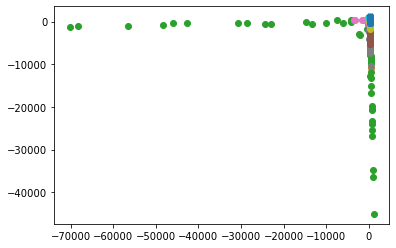

In [34]:
show_reduced_fig(n_reduced, name_labels)

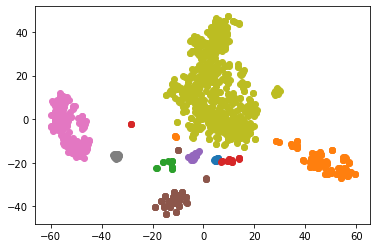

In [33]:
show_reduced_fig(tsne_reduced, name_labels[0:1000])